In [342]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

sns.set_context('paper', font_scale=2)

if not os.path.exists('plots'):
    os.mkdir('plots')

In [343]:
orig_data = pd.read_csv('data/dynamic-fair-division3.csv')

In [344]:
orig_data['eps'] = 1 - orig_data.welfare
orig_data['bundle_dif'] = (orig_data.bundle_size_1 - orig_data.bundle_size_n).abs()
orig_data[['datagenerator','iteration']] = orig_data.dataset.str.split('-', expand=True)

In [345]:
orig_data

,dataset,num_agents,alg,timestep,welfare,envy_12,envy_n1,ef,bundle_size_1,bundle_size_n,val_per_item_11,val_per_item_1n,eps,bundle_dif,datagenerator,iteration
0,BETA_6_1-4,2,normal-short,1,1.000000,0.750223,-0.589110,0,1,0,0.750223,0.000000,0.000000,1,BETA_6_1,4
1,BETA_6_1-4,2,normal-short,2,0.999110,-0.199583,0.359183,0,1,1,0.750223,0.949805,0.000890,0,BETA_6_1,4
2,BETA_6_1-4,2,normal-short,3,0.999438,-1.080430,1.350910,0,1,2,0.750223,0.915324,0.000562,1,BETA_6_1,4
3,BETA_6_1-4,2,normal-short,4,0.999576,-0.202300,0.582503,0,2,2,0.814174,0.915324,0.000424,0,BETA_6_1,4
4,BETA_6_1-4,2,normal-short,5,0.973965,-1.148180,1.412330,0,2,3,0.814174,0.925509,0.026035,1,BETA_6_1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420795,recipes_exp-99,5,quantile-max,62802,0.869902,173.350000,-414.436000,0,16621,8918,0.055000,0.051410,0.130098,7703,recipes_exp,99
2420796,recipes_exp-99,5,quantile-max,70548,0.870304,195.000000,-461.826000,0,18641,10038,0.055011,0.051353,0.129696,8603,recipes_exp,99
2420797,recipes_exp-99,5,quantile-max,79248,0.870623,220.321000,-515.416000,0,20930,11303,0.055006,0.051386,0.129377,9627,recipes_exp,99
2420798,recipes_exp-99,5,quantile-max,89021,0.870709,248.343000,-574.099000,0,23515,12741,0.055006,0.051419,0.129291,10774,recipes_exp,99


In [346]:
for c in ['num_agents', 'datagenerator', 'alg']:
    print(f'{c}: {list(orig_data[c].unique())}')
print(list(orig_data.columns[5:-1]))

num_agents: [2, 5]
datagenerator: ['BETA_6_1', 'BETA_10_1', 'UNIF_COR_8_2', 'UNIF_COR_5_5', 'BETA_1_1', 'BETA_1_3', 'BETA_3_1', 'BETA_6_6', 'UNIF_COR_2_8', 'BETA_1_10', 'BETA_10_10', 'BETA_1_6', 'BETA_3_3', 'auto', 'auto_exp', 'recipes', 'recipes_exp']
alg: ['normal-short', 'normal-long', 'epoch-compare-short', 'epoch-compare-long', 'random-sampling', 'compare-to-all', 'welfare-max', 'quantile-max']
['envy_12', 'envy_n1', 'ef', 'bundle_size_1', 'bundle_size_n', 'val_per_item_11', 'val_per_item_1n', 'eps', 'bundle_dif', 'datagenerator']


In [347]:
data = orig_data[orig_data.num_agents == 5]
suffix = "-5"

In [348]:
beta_data_subset = data[(data.datagenerator.str.startswith('BETA')) & (data.alg.isin(['welfare-max', 'normal-long']))]

def clean_label(beta_name):
    _, a, b = beta_name.split('_')
    return fr'$\beta({a},{b})$'

beta_data_subset['Value Distribution'] = beta_data_subset.datagenerator.apply(clean_label)

skew_distributions = [r'$\beta(1,10)$', r'$\beta(1,6)$', r'$\beta(1,3)$', r'$\beta(1,1)$', r'$\beta(3,1)$',r'$\beta(6,1)$',r'$\beta(10,1)$']
peak_distributions = [r'$\beta(1,1)$', r'$\beta(3,3)$', r'$\beta(6,6)$',r'$\beta(10,10)$']

/var/folders/95/245h4tm10dq3x154xf20g1jr0000gn/T/ipykernel_8665/3199837174.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beta_data_subset['Value Distribution'] = beta_data_subset.datagenerator.apply(clean_label)


/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


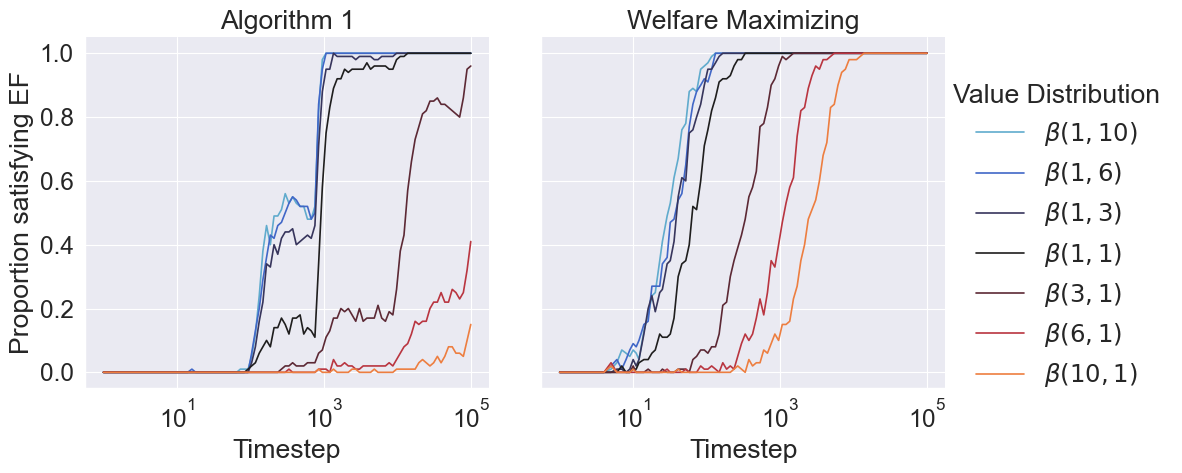

In [349]:
g = sns.relplot(data=beta_data_subset,
                kind='line',
                x='timestep',
                y='ef',
                palette='icefire',
                hue='Value Distribution',
                hue_order=skew_distributions,
                errorbar=None,
                col='alg'
                )
plt.xscale('log')
g.set_xlabels('Timestep')
g.set_ylabels('Proportion satisfying EF')
g.axes[0, 0].set_title("Algorithm 1")
g.axes[0, 1].set_title("Welfare Maximizing")
g._legend.set_title("Value Distribution")
plt.savefig(f'plots/skewed-ef{suffix}.pdf')

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


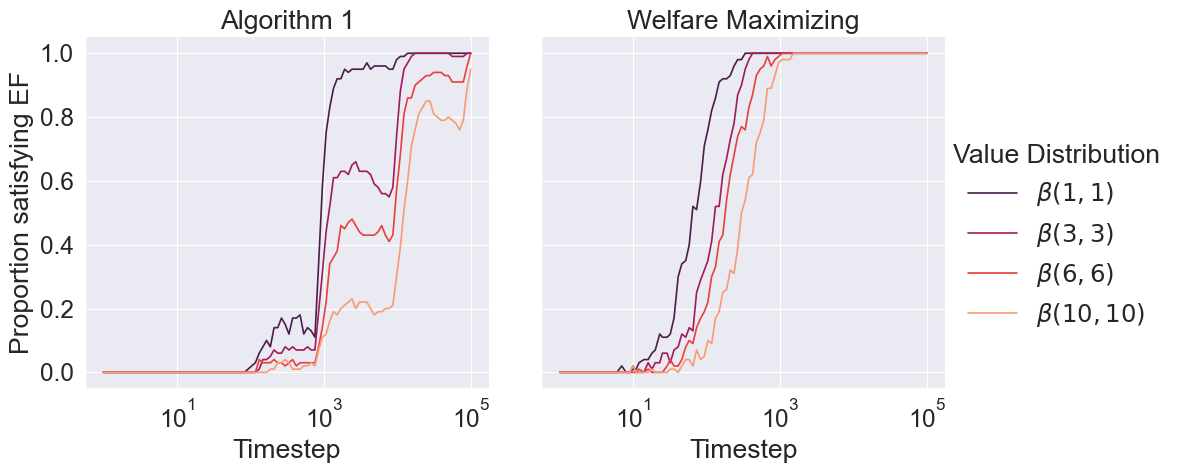

In [350]:
g = sns.relplot(data=beta_data_subset,
                kind='line',
                x='timestep',
                y='ef',
                palette='rocket',
                hue='Value Distribution',
                hue_order=peak_distributions,
                errorbar=None,
                col='alg'
                )
plt.xscale('log')
g.set_xlabels('Timestep')
g.set_ylabels('Proportion satisfying EF')
g.axes[0, 0].set_title("Algorithm 1")
g.axes[0, 1].set_title("Welfare Maximizing")
g._legend.set_title("Value Distribution")
plt.savefig(f'plots/peaked-ef{suffix}.pdf')

In [351]:
secondary_vals = [3, 6, 10]
sub_dfs = []
x_vals = np.linspace(0, 1, 101)
for a, b in [(1, 1)] + [(i, i) for i in secondary_vals] + [(1, i) for i in secondary_vals] + [(i, 1) for i in secondary_vals]:
# for a, b in [(1, 1)] + [(1, i) for i in secondary_vals] + [(i, 1) for i in secondary_vals]:
    sub_df = pd.DataFrame()
    sub_df['x'] = x_vals
    sub_df['y'] = stats.beta.pdf(x_vals, a, b)
    sub_df['Distribution'] = fr'$\beta({a},{b})$'
    sub_dfs.append(sub_df)

pdfs = pd.concat(sub_dfs)

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


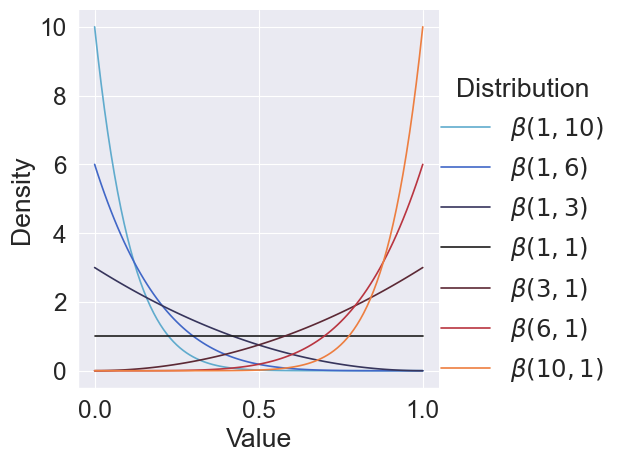

In [352]:

g = sns.relplot(data=pdfs,
                kind='line',
                x='x',
                y='y',
                hue='Distribution',
                palette='icefire',
                hue_order=skew_distributions,
                errorbar=None,
                # estimator =lambda s: s.quantile(q=.5)
                )
plt.xlabel('Value')
plt.ylabel('Density')
g.savefig(f'plots/skewed-dists{suffix}.pdf')

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


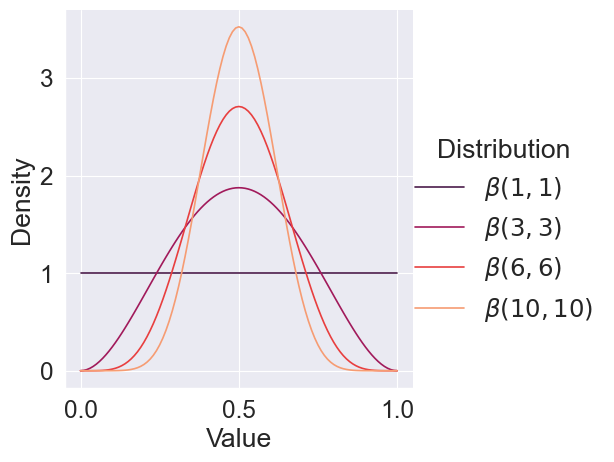

In [353]:
g = sns.relplot(data=pdfs,
                kind='line',
                x='x',
                y='y',
                hue='Distribution',
                palette='rocket',
                hue_order=peak_distributions,
                errorbar=None,
                # estimator =lambda s: s.quantile(q=.5)
                )
plt.xlabel('Value')
plt.ylabel('Density')
g.savefig(f'plots/peaked-dists{suffix}.pdf')

In [354]:
cor_data_subset = data[(data.datagenerator.isin(['BETA_1_1', 'UNIF_COR_8_2', 'UNIF_COR_5_5', 'UNIF_COR_2_8'])) & (data.alg.isin(['welfare-max', 'normal-long']))]
name_mapping = {
    'BETA_1_1': '0',
    'UNIF_COR_2_8': '0.2',
    'UNIF_COR_5_5': '0.5',
    'UNIF_COR_8_2': '0.8'
}
cor_data_subset['alpha'] = cor_data_subset.datagenerator.map(name_mapping)
alpha_vals = ['0', '0.2', '0.5', '0.8']
cor_data_subset

/var/folders/95/245h4tm10dq3x154xf20g1jr0000gn/T/ipykernel_8665/3934305350.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cor_data_subset['alpha'] = cor_data_subset.datagenerator.map(name_mapping)


,dataset,num_agents,alg,timestep,welfare,envy_12,envy_n1,ef,bundle_size_1,bundle_size_n,val_per_item_11,val_per_item_1n,eps,bundle_dif,datagenerator,iteration,alpha
3649,UNIF_COR_8_2-1,5,normal-long,1,0.802052,0.673680,-0.802073,0,1,0,0.673680,0.000000,0.197948,1,UNIF_COR_8_2,1,0.8
3650,UNIF_COR_8_2-1,5,normal-long,2,0.796455,-0.004545,-0.802073,0,1,0,0.673680,0.000000,0.203545,1,UNIF_COR_8_2,1,0.8
3651,UNIF_COR_8_2-1,5,normal-long,3,0.872224,-0.004545,-0.802073,0,1,0,0.673680,0.000000,0.127776,1,UNIF_COR_8_2,1,0.8
3652,UNIF_COR_8_2-1,5,normal-long,4,0.871361,-0.004545,-0.802073,0,1,0,0.673680,0.000000,0.128639,1,UNIF_COR_8_2,1,0.8
3653,UNIF_COR_8_2-1,5,normal-long,5,0.879217,-0.004545,-0.004796,0,1,1,0.673680,0.691134,0.120783,0,UNIF_COR_8_2,1,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942242,UNIF_COR_8_2-99,5,welfare-max,62802,1.000000,1104.890000,1065.950000,1,12556,12569,0.568115,0.485114,0.000000,13,UNIF_COR_8_2,99,0.8
1942243,UNIF_COR_8_2-99,5,welfare-max,70548,1.000000,1220.080000,1214.650000,1,14105,14123,0.567610,0.486092,0.000000,18,UNIF_COR_8_2,99,0.8
1942244,UNIF_COR_8_2-99,5,welfare-max,79248,1.000000,1408.110000,1367.300000,1,15869,15913,0.567833,0.485957,0.000000,44,UNIF_COR_8_2,99,0.8
1942245,UNIF_COR_8_2-99,5,welfare-max,89021,1.000000,1565.410000,1593.990000,1,17787,17915,0.567051,0.486199,0.000000,128,UNIF_COR_8_2,99,0.8


/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


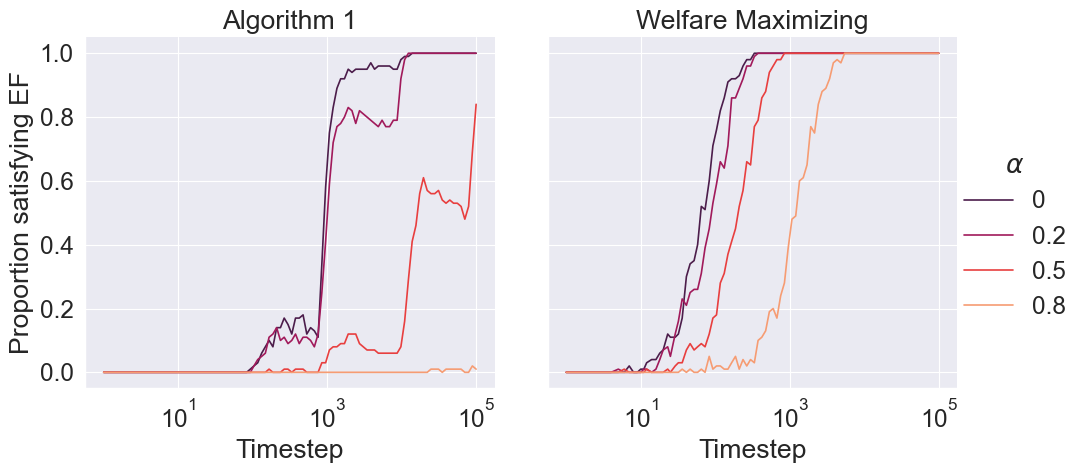

In [355]:
g = sns.relplot(data=cor_data_subset,
                kind='line',
                x='timestep',
                y='ef',
                palette='rocket',
                hue='alpha',
                hue_order=alpha_vals,
                errorbar=None,
                col='alg'
                )
plt.xscale('log')
g.set_xlabels('Timestep')
g.set_ylabels('Proportion satisfying EF')
g.axes[0, 0].set_title("Algorithm 1")
g.axes[0, 1].set_title("Welfare Maximizing")
g._legend.set_title(r"$\alpha$")
plt.savefig(f'plots/cor-ef{suffix}.pdf')

In [356]:
real_data_subset = data[(data.datagenerator.isin(['auto', 'auto_exp', 'recipes', 'recipes_exp'])) & (data.alg.isin(['quantile-max', 'normal-long']))]
real_data_subset['Dataset'] = real_data_subset.datagenerator.map({
    'auto': 'Auto',
    'auto_exp': 'Auto-exp',
    'recipes': 'Recipes',
    'recipes_exp': 'Recipes-exp'
})

/var/folders/95/245h4tm10dq3x154xf20g1jr0000gn/T/ipykernel_8665/1119978112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data_subset['Dataset'] = real_data_subset.datagenerator.map({


/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


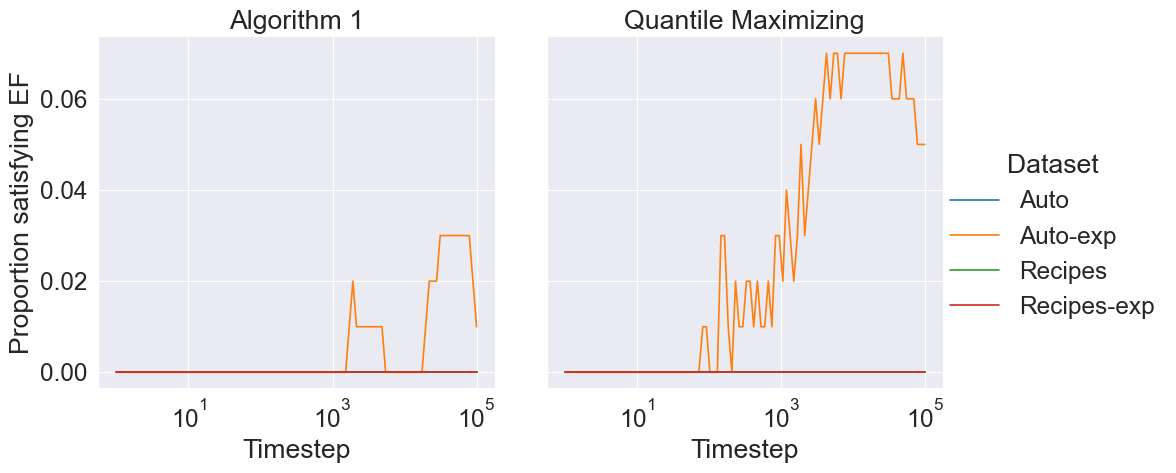

In [357]:
g = sns.relplot(data=real_data_subset,
                kind='line',
                x='timestep',
                y='ef',
                hue='Dataset',
                errorbar=None,
                col='alg',
                palette='tab10'
                )
plt.xscale('log')
g.set_xlabels('Timestep')
g.set_ylabels('Proportion satisfying EF')
g.axes[0, 0].set_title("Algorithm 1")
g.axes[0, 1].set_title("Quantile Maximizing")
g._legend.set_title("Dataset")
plt.savefig(f'plots/real-ef{suffix}.pdf')

In [358]:
beta_just_alg = beta_data_subset[(beta_data_subset.alg == 'normal-long')]

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


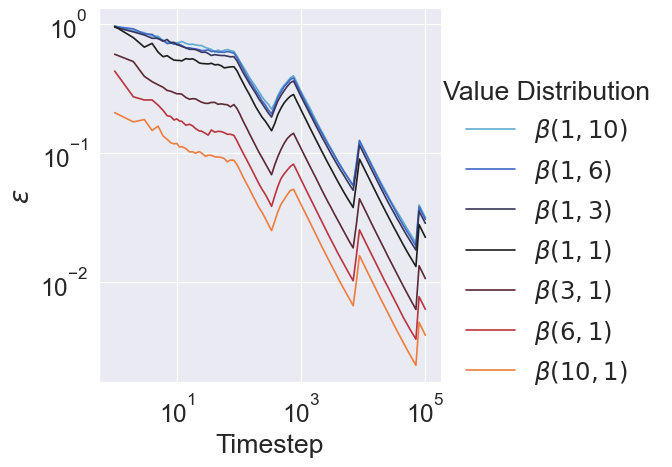

In [359]:
g = sns.relplot(data=beta_just_alg,
                kind='line',
                x='timestep',
                y='eps',
                palette='icefire',
                hue='Value Distribution',
                hue_order=skew_distributions,
                errorbar=None,
                estimator= lambda s: s.quantile(q=.95)
                )
plt.xscale('log')
plt.yscale('log')
g.set_xlabels('Timestep')
g.set_ylabels(r"$\varepsilon$")
g._legend.set_title("Value Distribution")
plt.savefig(f'plots/skewed-welf{suffix}.pdf')

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


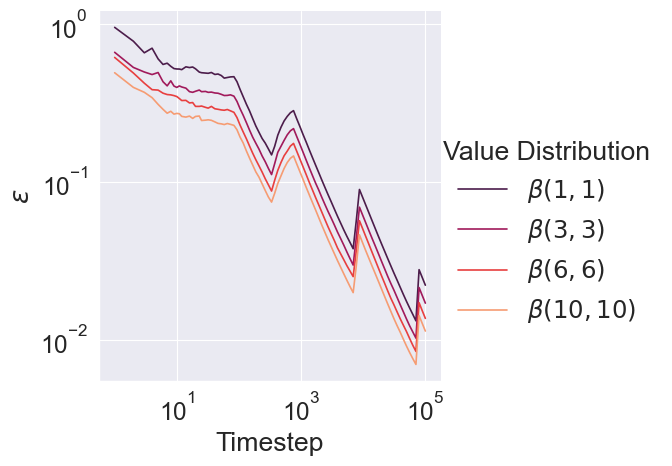

In [360]:
g = sns.relplot(data=beta_just_alg,
                kind='line',
                x='timestep',
                y='eps',
                palette='rocket',
                hue='Value Distribution',
                hue_order=peak_distributions,
                errorbar=None,
                estimator= lambda s: s.quantile(q=.95)
                )
plt.xscale('log')
plt.yscale('log')
g.set_xlabels('Timestep')
g.set_ylabels(r"$\varepsilon$")
g._legend.set_title("Value Distribution")
plt.savefig(f'plots/peaked-welf{suffix}.pdf')

In [361]:
cor_just_alg = cor_data_subset[(cor_data_subset.alg == 'normal-long')]

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


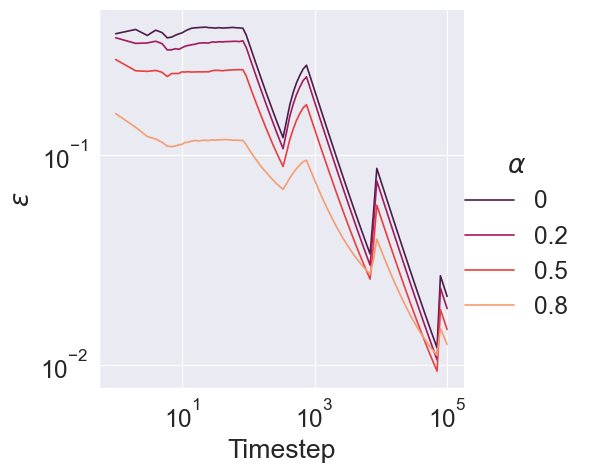

In [362]:
g = sns.relplot(data=cor_just_alg,
                kind='line',
                x='timestep',
                y='eps',
                palette='rocket',
                hue='alpha',
                hue_order=alpha_vals,
                errorbar=None
                )
plt.xscale('log')
plt.yscale('log')
g.set_xlabels('Timestep')
g.set_ylabels(r"$\varepsilon$")
g._legend.set_title(r"$\alpha$")
plt.savefig(f'plots/cor-welf{suffix}.pdf')

In [363]:
name_map = {
    'normal-long': 'Algorithm 1',
    'normal-short': 'Shorter epochs',
    'epoch-compare-long': 'Exploit items sampled',
    'compare-to-all': 'No epochs'
}
tested_dists = ['BETA_6_1', 'BETA_10_10', 'UNIF_COR_5_5']
alg_order = ['Algorithm 1', 'Shorter epochs', 'Exploit items sampled', 'No epochs']
uniform_data = data[(data.datagenerator.isin(tested_dists)) & (data.alg.isin(name_map.keys()))]
uniform_data['alg-names'] = uniform_data.alg.map(name_map)
uniform_data

/var/folders/95/245h4tm10dq3x154xf20g1jr0000gn/T/ipykernel_8665/7501725.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniform_data['alg-names'] = uniform_data.alg.map(name_map)


,dataset,num_agents,alg,timestep,welfare,envy_12,envy_n1,ef,bundle_size_1,bundle_size_n,val_per_item_11,val_per_item_1n,eps,bundle_dif,datagenerator,iteration,alg-names
712,BETA_6_1-4,5,normal-short,1,0.776740,0.750223,-0.828249,0,1,0,0.750223,0.000000,0.223260,1,BETA_6_1,4,Shorter epochs
713,BETA_6_1-4,5,normal-short,2,0.886645,-0.199583,-0.828249,0,1,0,0.750223,0.000000,0.113355,1,BETA_6_1,4,Shorter epochs
714,BETA_6_1-4,5,normal-short,3,0.863903,-0.199583,-0.828249,0,1,0,0.750223,0.000000,0.136097,1,BETA_6_1,4,Shorter epochs
715,BETA_6_1-4,5,normal-short,4,0.890803,-0.199583,-0.828249,0,1,0,0.750223,0.000000,0.109197,1,BETA_6_1,4,Shorter epochs
716,BETA_6_1-4,5,normal-short,5,0.886075,-0.199583,-0.008598,0,1,1,0.750223,0.945880,0.113925,0,BETA_6_1,4,Shorter epochs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907977,UNIF_COR_5_5-99,5,compare-to-all,62802,0.993346,261.475000,5633.000000,0,9509,15425,0.691009,0.462805,0.006654,5916,UNIF_COR_5_5,99,No epochs
1907978,UNIF_COR_5_5-99,5,compare-to-all,70548,0.993351,158.414000,6335.970000,0,10653,17304,0.691319,0.463480,0.006649,6651,UNIF_COR_5_5,99,No epochs
1907979,UNIF_COR_5_5-99,5,compare-to-all,79248,0.993387,114.074000,7087.980000,0,11963,19348,0.691405,0.464371,0.006613,7385,UNIF_COR_5_5,99,No epochs
1907980,UNIF_COR_5_5-99,5,compare-to-all,89021,0.993443,-2.677820,7936.800000,0,13420,21651,0.691626,0.464731,0.006557,8231,UNIF_COR_5_5,99,No epochs


/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


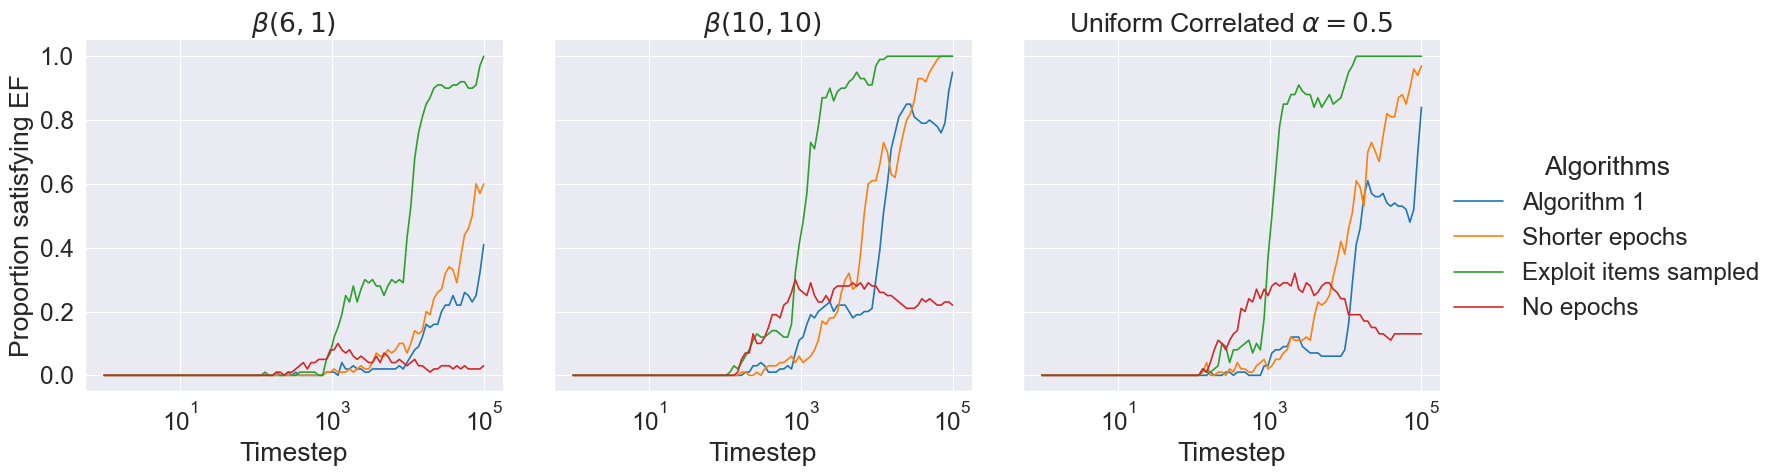

In [364]:
g = sns.relplot(uniform_data,
            x='timestep',
            kind='line',
            y='ef',
            hue='alg-names',
            errorbar=None,
            hue_order=alg_order,
            col='datagenerator',
            col_order=tested_dists
)
plt.xscale('log')

g.axes[0, 0].set_title(r'$\beta(6,1)$')
g.axes[0, 1].set_title(r'$\beta(10,10)$')
g.axes[0, 2].set_title(r"Uniform Correlated $\alpha = 0.5$")
g.set_xlabels('Timestep')
g.set_ylabels('Proportion satisfying EF')
g._legend.set_title("Algorithms")
g.savefig(f'plots/algs-ef{suffix}.pdf')

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


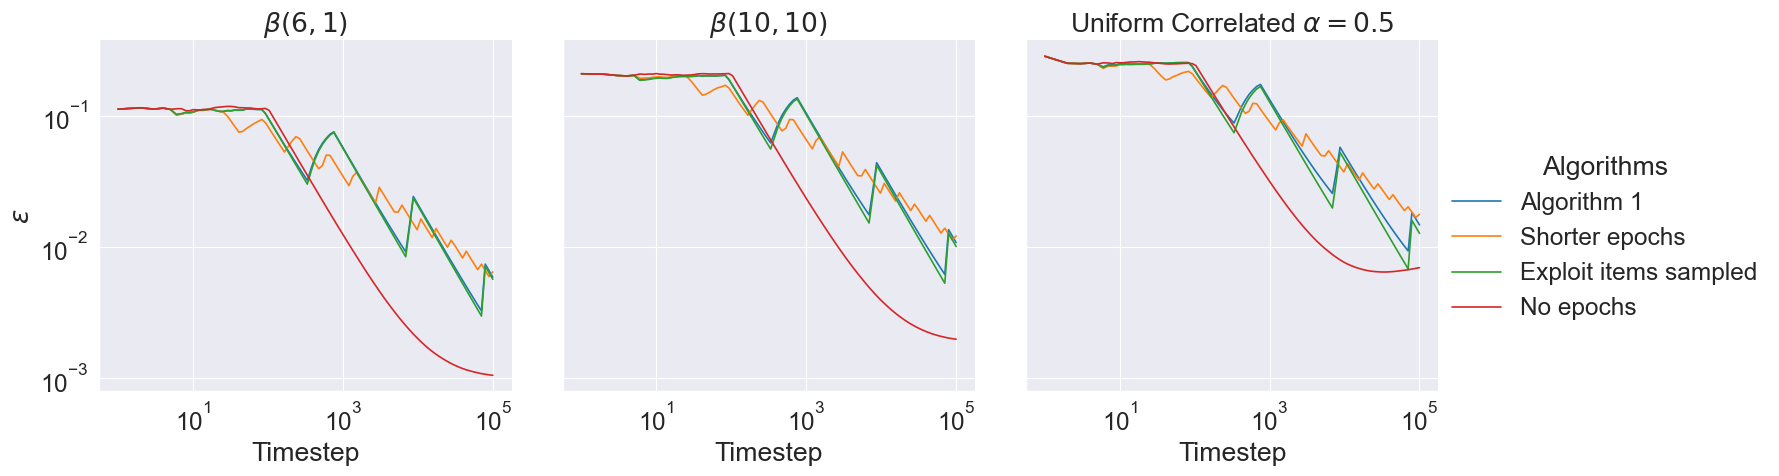

In [365]:
g = sns.relplot(uniform_data,
            x='timestep',
            kind='line',
            y='eps',
            hue='alg-names',
            errorbar=None,
            hue_order=alg_order,
            col='datagenerator',
            col_order=tested_dists
)
plt.xscale('log')
plt.yscale('log')
g.axes[0, 0].set_title(r'$\beta(6,1)$')
g.axes[0, 1].set_title(r'$\beta(10,10)$')
g.axes[0, 2].set_title(r"Uniform Correlated $\alpha = 0.5$")
g.set_xlabels('Timestep')
g.set_ylabels(r'$\varepsilon$')
g._legend.set_title("Algorithms")
g.savefig(f'plots/algs-welf{suffix}.pdf')

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


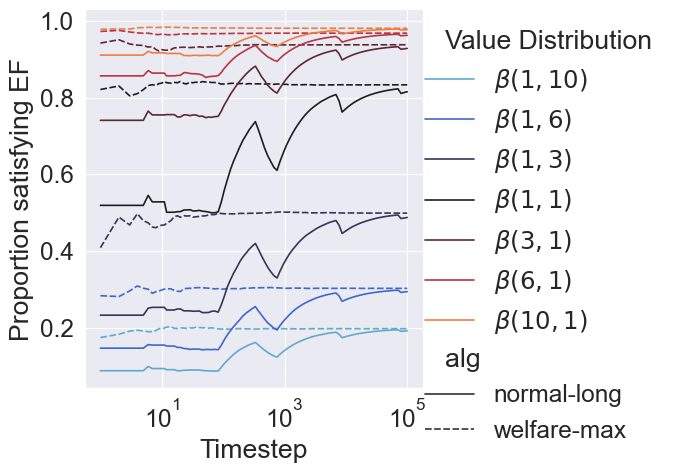

In [366]:
g = sns.relplot(data=beta_data_subset[beta_data_subset.bundle_size_1 > 0],
                kind='line',
                x='timestep',
                y='val_per_item_11',
                palette='icefire',
                hue='Value Distribution',
                hue_order=skew_distributions,
                errorbar=None,
                style='alg'
                )
plt.xscale('log')
g.set_xlabels('Timestep')
g.set_ylabels('Proportion satisfying EF')
# g.savefig(f'plots/skewed-ef{suffix}.pdf')

In [367]:
beta_data_subset.columns

Index(['dataset', 'num_agents', 'alg', 'timestep', 'welfare', 'envy_12',
       'envy_n1', 'ef', 'bundle_size_1', 'bundle_size_n', 'val_per_item_11',
       'val_per_item_1n', 'eps', 'bundle_dif', 'datagenerator', 'iteration',
       'Value Distribution'],
      dtype='object')

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


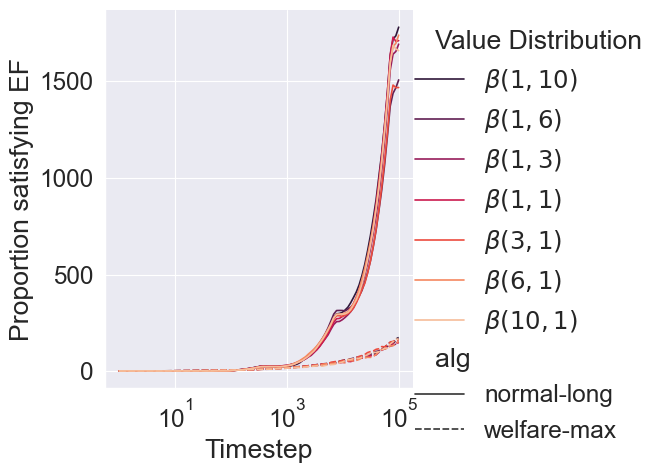

In [368]:
g = sns.relplot(data=beta_data_subset,
                kind='line',
                x='timestep',
                y='bundle_dif',
                palette='rocket',
                hue='Value Distribution',
                hue_order=skew_distributions,
                errorbar=None,
                style='alg'
                )
plt.xscale('log')
g.set_xlabels('Timestep')
g.set_ylabels('Proportion satisfying EF')